In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Reading the data
df = pd.read_excel("demand-plan-design-data.xlsx")
print(df.shape)
print(df.info())

(401720, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401720 entries, 0 to 401719
Data columns (total 11 columns):
Date                    401720 non-null datetime64[ns]
Store                   401720 non-null object
Warehouse               401720 non-null object
Product_ID              401720 non-null int64
Product_category        401720 non-null object
Product_Sub_Category    401720 non-null object
Product_SKU             401720 non-null object
sales                   401720 non-null int64
channel                 401720 non-null object
Location                401720 non-null object
Location_Code           401720 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 33.7+ MB
None


In [2]:
df.describe()

,Product_ID,sales
count,401720.000000,401720.000000
mean,111.500000,54.459422
std,6.344297,29.629829
min,101.000000,0.000000
25%,106.000000,31.000000
50%,111.500000,50.000000
75%,117.000000,73.000000
max,122.000000,231.000000


In [3]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Product_ID    11.0
sales         42.0
dtype: float64


In [4]:
df = df[['Product_ID','sales']]

In [5]:
print(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))

        Product_ID  sales
0            False  False
1            False  False
2            False  False
3            False  False
4            False  False
5            False  False
6            False  False
7            False  False
8            False  False
9            False  False
10           False  False
11           False  False
12           False  False
13           False  False
14           False  False
15           False  False
16           False  False
17           False  False
18           False  False
19           False  False
20           False  False
21           False  False
22           False  False
23           False  False
24           False  False
25           False  False
26           False  False
27           False  False
28           False  False
29           False  False
...            ...    ...
401690       False  False
401691       False  False
401692       False  False
401693       False  False
401694       False  False
401695       False  False
401696      

TypeError: cannot compare a dtyped [bool] array with a scalar of type [NoneType]

In [6]:
df_out = df[((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(df_out.shape)

(4292, 2)


In [7]:
df.head()

,Product_ID,sales
0,101,13
1,101,11
2,101,14
3,101,13
4,101,10


In [8]:
df_out.head()

,Product_ID,sales
21330,102,139
21365,102,138
21714,102,150
21742,102,137
21750,102,137


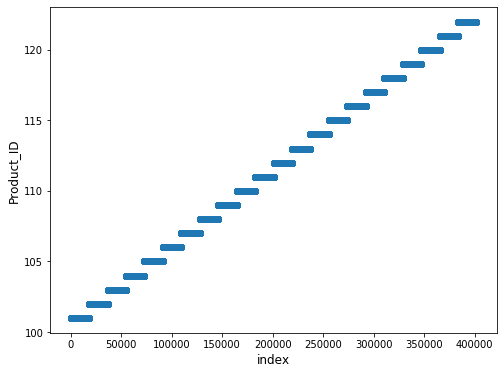

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df.Product_ID.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('Product_ID', fontsize=12)
plt.show()

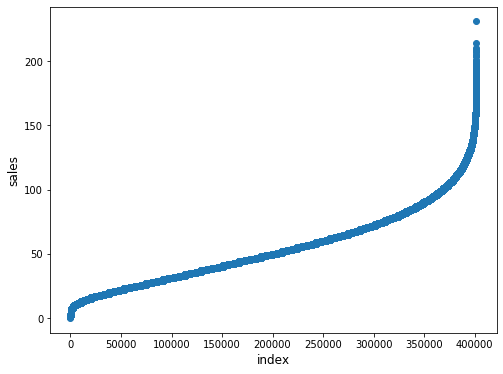

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df.sales.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('sales', fontsize=12)
plt.show()

Text(0.5, 0, 'Product_ID')

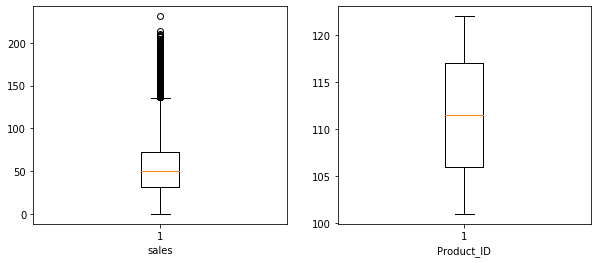

In [11]:
df['sales'].value_counts(dropna=False).sort_index(ascending = True)
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(df['sales'])
ax1.set_xlabel('sales')
ax2.boxplot(df['Product_ID'])
ax2.set_xlabel('Product_ID')

In [12]:
u=4292

In [13]:

u=u/401720
print (u*100)

1.0684058548242557
